# Examples of H-K Stacking of Receiver Functions

This notebook demonstrates the H-K Stacking analysis of receiver functions and the visualisation of the results based on [rfsed](https://github.com/akinremisa/rfsed) package


The required functions are first imported

In [1]:
import os 
import numpy as np
from rf.rfstream import read_rf
from rfsed.hkZhu import hk, plothk
import h5py
from obspy import read
from rfsed.util import rfMoho_example, rfSed_example, save_plot

The station and the directory to save the output are defined. 

In [2]:
staname='OPLO'
savedir=save_plot()
savepath = savedir + '/HK_Stacking_Zhu/'
if not os.path.exists(savepath):  # create data folder if necessary
    os.mkdir(savepath)
#----------------------------------------------------------

## Example of H-K Stacking for Crustal Layer

H-K Stacking weighting and the grid search (the Depth (H) and Vp/Vs (K)) parameters are set

In [3]:
w1, w2, w3 = [0.6, 0.3, 0.1]
K= np.linspace(1.65,1.95,121)
H=np.linspace(20,60,201)

The receiver function data is read and  data parameters like preonset (time before direct P-wave in the data) and Vp of the crust are defined

In [4]:
rfst = rfMoho_example()
rfstreams = rfst.select(component='R', station=staname)
preonset=10
Vp=6.9

The H-K stacking is done and the results are visualised for the case of Moho structure using low frequency receiver functions

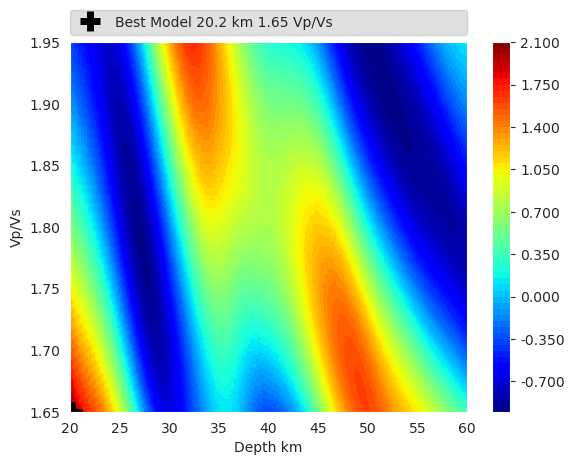

Best depth:  20.2 Best Vp/Vs: 1.65 Max stack:  2.075194085424461


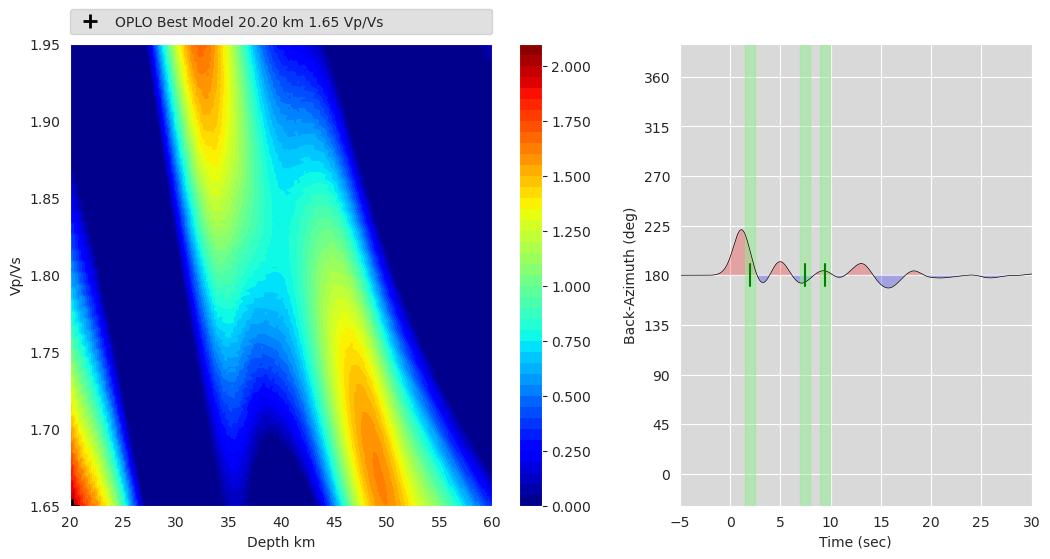

In [5]:
Result=hk(rfstreams, preonset, layer='Moho', stack=True, w1 = w1, w2 = w2, w3 = w3, K= K, H=H, Vp = Vp)
plothk(HKResult=Result, g = [75.,10., 15., 2.5], rmneg = None, savepath=savepath, format = 'jpg')

## Example of H-K Stacking for Sediment Layer

H-K Stacking weighting and the grid search (the Depth (H) and Vp/Vs (K)) parameters are set

In [6]:
w1, w2, w3 = [0.6, 0.3, 0.1]
K= np.linspace(1.65,2.25,201)
H=np.linspace(0,10,201)

The receiver function data is read and  data parameters like preonset (time before direct P-wave in the data) and Vp of the crust are defined

In [7]:
rfst = rfSed_example()
rfstreams = rfst.select(component='R', station=staname)
preonset=10
Vp=2.5

The H-K stacking is done and the results are visualised for the case of Moho structure using high frequency receiver functions

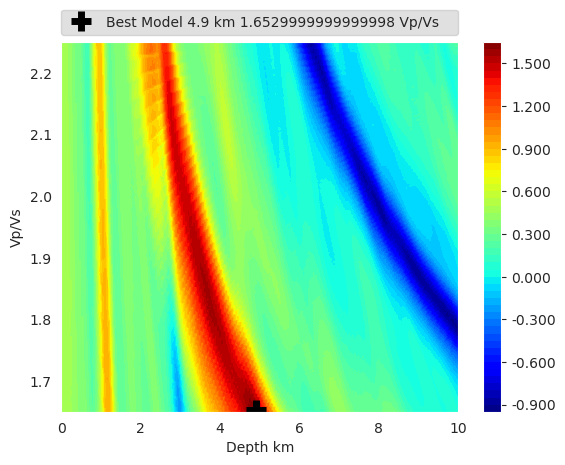

Best depth:  4.9 Best Vp/Vs: 1.6529999999999998 Max stack:  1.644835702991137


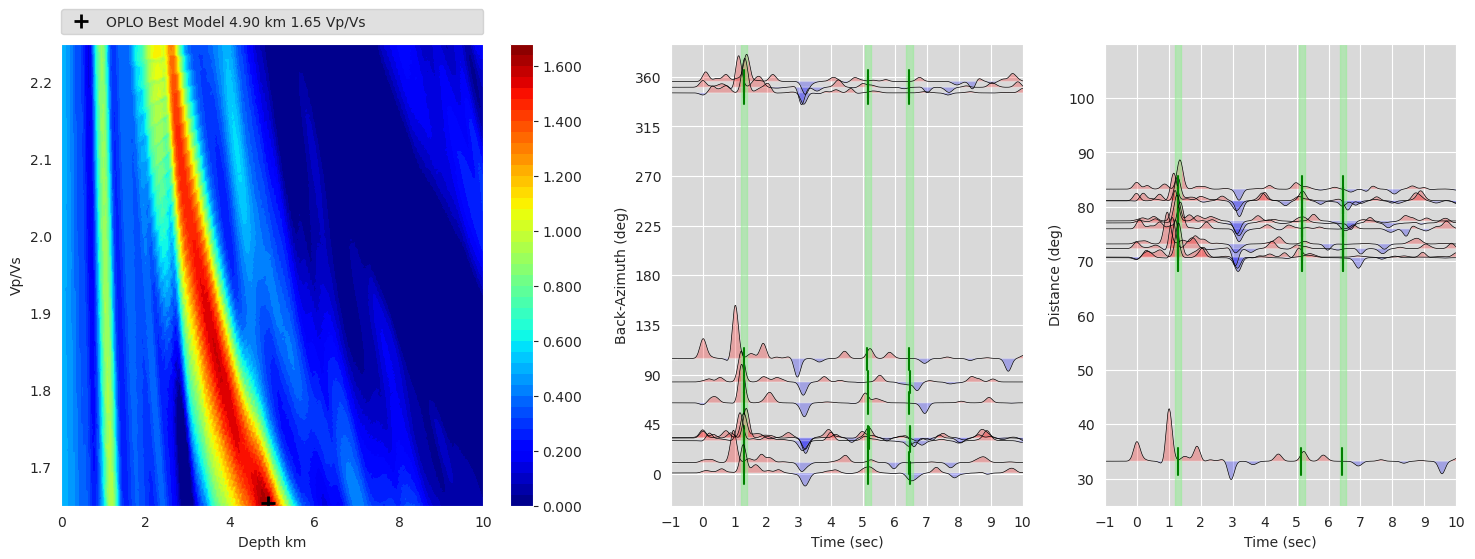

In [8]:
Result=hk(rfstreams, preonset, layer='Sed', stack=False, w1 = w1, w2 = w2, w3 = w3, K= K, H=H, Vp = Vp)
plothk(HKResult=Result, g = [75.,10., 15., 2.5], rmneg = None, savepath=savepath, format = 'jpg')